C:\Users\tpri\AppData\Local\Temp\ipykernel_252\3261238486.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  sc = plt.scatter(x,y, s=100, cmap=cmap, norm=norm)


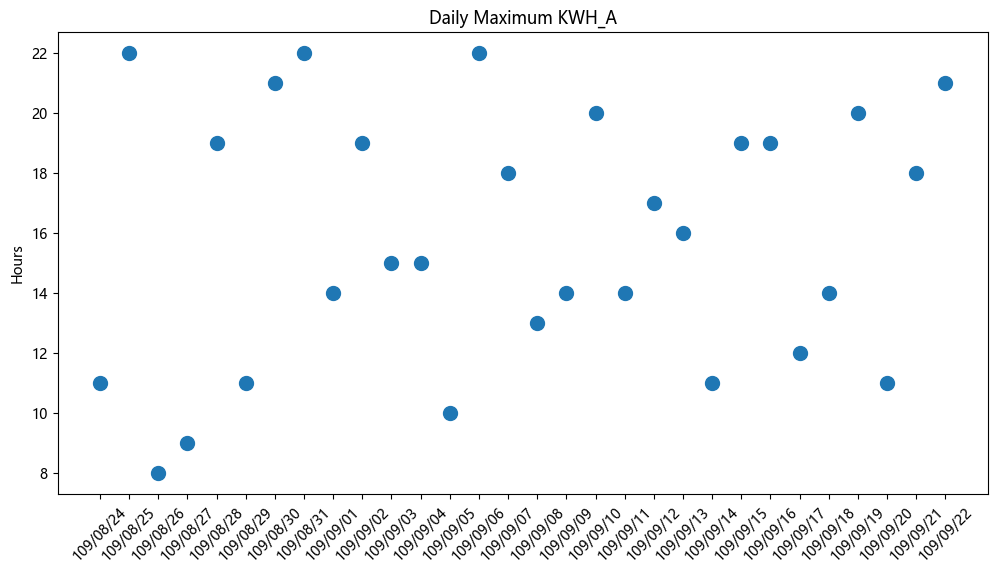

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np;
# 讀取CSV文件
data = pd.read_csv('2_groupby/output_1.csv',encoding='ANSI')
#找year=2020
data_2020 = data[data['Year'] == 2020]
# 根據fcustomerid列對數據進行分組
grouped = data_2020.groupby('Date')
max_kwh = grouped.apply(lambda x: x.loc[x['KWH_A'].idxmax(), [ 'Hour', 'KWH_A']])
# 取前30筆資料
max_kwh = max_kwh.head(30)
# 重置索引
max_kwh = max_kwh.reset_index()

# 設置matplotlib中文顯示
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'

# 創建畫布


x = max_kwh['Date']
y = max_kwh['Hour']


fig, ax = plt.subplots(figsize=(12, 6))
# 設定 x 軸的日期格式
plt.xticks(rotation=45)
# ax.xaxis.set_major_formatter(plt.DateFormatter('%Y-%m-%d'))

# 設定 y 軸標籤
ax.set_ylabel('Hours')

# 設定標題
ax.set_title('Daily Maximum KWH_A')





# names = np.array(list("ABCDEFGHIJKLMNO"))
names = np.asarray(max_kwh['KWH_A']).astype('str')

# c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

sc = plt.scatter(x,y, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    # text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
    #                        " ".join([names[n] for n in ind["ind"]]))
    text = "{} kwh".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    # annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

os.makedirs('3_找出每天用電量最高在幾點', exist_ok=True)
# 顯示圖片
plt.savefig('3_找出每天用電量最高在幾點/output_matplotlib.png')
plt.show()